In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random())
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.3
dask                        2023.5.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.1
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite     

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [ ]:
adata_epcam2=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/h5ad/Epcam_umap_working_03_01.h5ad')

In [ ]:
adata_epcam3=adata_epcam2.copy()

In [ ]:
adata_all=sc.read_h5ad('/home/julia/data/placodes/h5ad/11_umap.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


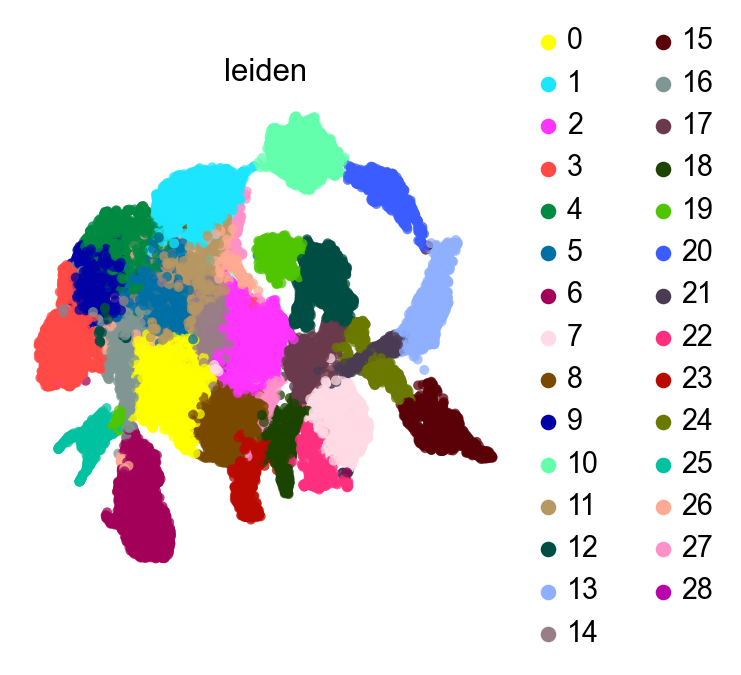

In [ ]:
sc.pl.umap(adata_epcam3, color = ["leiden"], color_map = reds_cmap, frameon = False, size = 80, alpha = .75)

In [ ]:
sc.tl.leiden(adata_epcam3, resolution=2.2)

running Leiden clustering
    finished: found 50 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


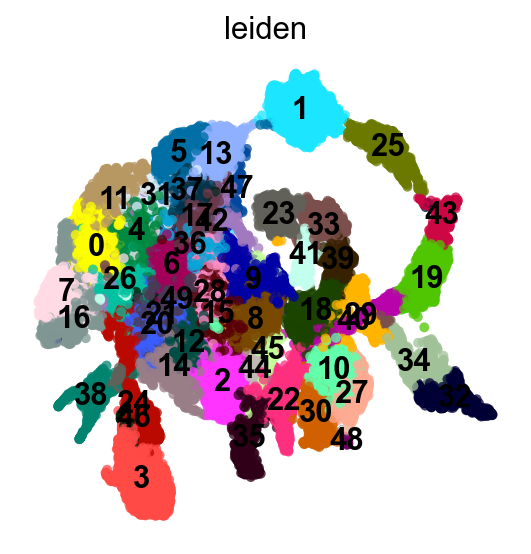

In [ ]:
sc.pl.umap(adata_epcam3, color = ["leiden"], color_map = reds_cmap, frameon = False, size = 80, alpha = .75, legend_loc='on data')

In [ ]:
plt.rcParams['figure.dpi'] = 80 # 200 e.g. is really fine, but slower

In [ ]:
cluster_annotations = {
    '0': 'rest','1': 'Otic vesicle','2': 'Adenohypophyseal', '3': 'rest', '4': 'rest', '5': 'Otic',
    '6': 'Epibranchial', '7': 'rest', '8': 'Trigeminal','9': 'Epibranchial', '10': 'rest','11': 'rest',
    '12': 'rest','13': 'Otic','14': 'Adenohypophyseal', '15': 'Trigeminal','16': 'rest','17': 'Epibranchial',
    '18': 'Epibranchial neurulation','19': 'Trigeminal  neurulation','20': 'rest','21': 'rest','22': 'Lens',
    '23': 'rest','24': 'rest','25': 'Otic  neurulation','26': 'rest','27': 'rest','28': 'Epibranchial','29': 'Trigeminal  neurulation','30': 'rest','31': 'rest',
    '32': 'Epibranchial neurulation','33': 'rest', '34': 'Epibranchial neurulation',  '35': 'Olfactory','36': 'Epibranchial',
    '37': 'Otic','38': 'rest','39': 'rest','40': 'Epibranchial neurulation','41': 'rest','42': 'Otic','43': 'Trigeminal  neurulation',
    '44': 'rest','45': 'rest','46': 'rest','47': 'Otic','48': 'rest','49': 'rest'   }

adata_epcam3.obs['cluster_annotations'] = adata_epcam3.obs['leiden'].map(cluster_annotations)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


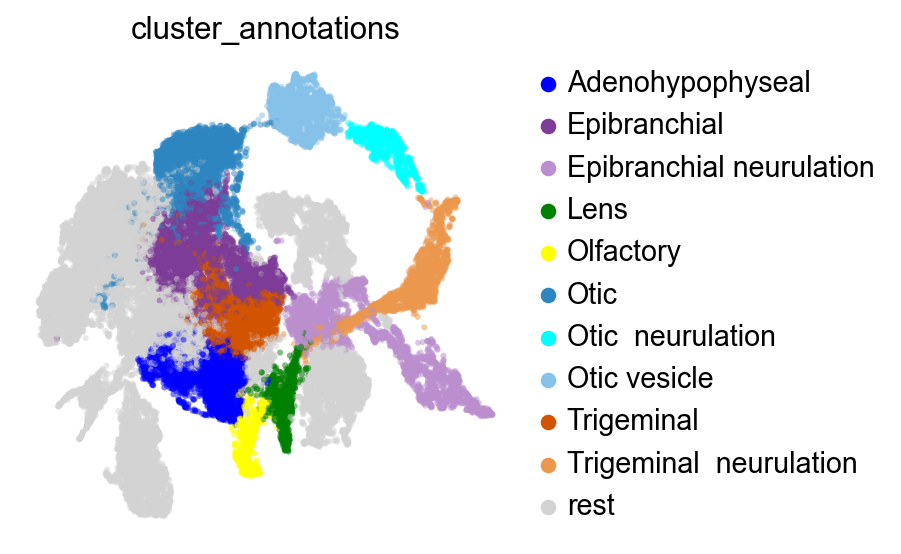

In [ ]:

adata_epcam3.obs['cluster_annotations'] = adata_epcam3.obs['leiden'].map(cluster_annotations)

adata_epcam3.obs['cluster_annotations'] = adata_epcam3.obs['cluster_annotations'].astype('category')

highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Epibranchial neurulation': '#bb8fce',
    'Lens': 'green',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Otic vesicle': '#85c1e9',
    'Otic  neurulation':'#00FFFF',
    'Trigeminal': '#d35400',
    'Trigeminal  neurulation': '#eb984e',
    'rest': 'lightgray'  # Gray for "rest"
}

adata_epcam3.uns['cluster_annotations_colors'] = [
    highlight_colors[cat] if cat in highlight_colors else 'lightgray'
    for cat in adata_epcam3.obs['cluster_annotations'].cat.categories
]

sc.pl.umap(
    adata_epcam3,
    color='cluster_annotations',
    frameon=False,
    size=30,
    alpha=0.5,
    #save='epcam_all.pdf'
)


In [ ]:
adata_epcam3

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap', 'cluster_annotations_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
# Порог экспрессии
min_frac = 0.07
# Уникальные типы клеток
cell_types = adata_epcam3.obs['cluster_annotations'].unique().tolist()

# Функция, чтобы получить список экспрессируемых генов
def get_expressed_genes(adata_subset, min_frac):
    expr = np.array((adata_subset.X > 0).mean(axis=0)).flatten()
    return adata_subset.var_names[expr >= min_frac].tolist()

# Сохраняем всё в локальные переменные (динамически)
for ct in cell_types:
    # Сделаем имя переменной безопасным
    varname = f"genes_{ct.lower().replace(' ', '_').replace('/', '_')}"

    # Маска и поднабор
    mask = adata_epcam3.obs['cluster_annotations'] == ct
    adata_sub = adata_epcam3[mask]

    # Получение списка генов
    genes = get_expressed_genes(adata_sub, min_frac)

    # Создание переменной в глобальном пространстве имён
    globals()[varname] = genes

    # Печать для проверки
    print(f"{varname}: {len(genes)} genes")


genes_rest: 9494 genes
genes_trigeminal: 8883 genes
genes_epibranchial: 9119 genes
genes_otic: 8965 genes
genes_adenohypophyseal: 8946 genes
genes_otic_vesicle: 10424 genes
genes_epibranchial_neurulation: 10507 genes
genes_otic__neurulation: 9606 genes
genes_trigeminal__neurulation: 10177 genes
genes_olfactory: 10805 genes
genes_lens: 10421 genes


In [ ]:
main_forebrain=["Sox2","Otx2","Six3","Pax6","Foxg1","Fezf1", "leiden", "Epcam","Fezf2"]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


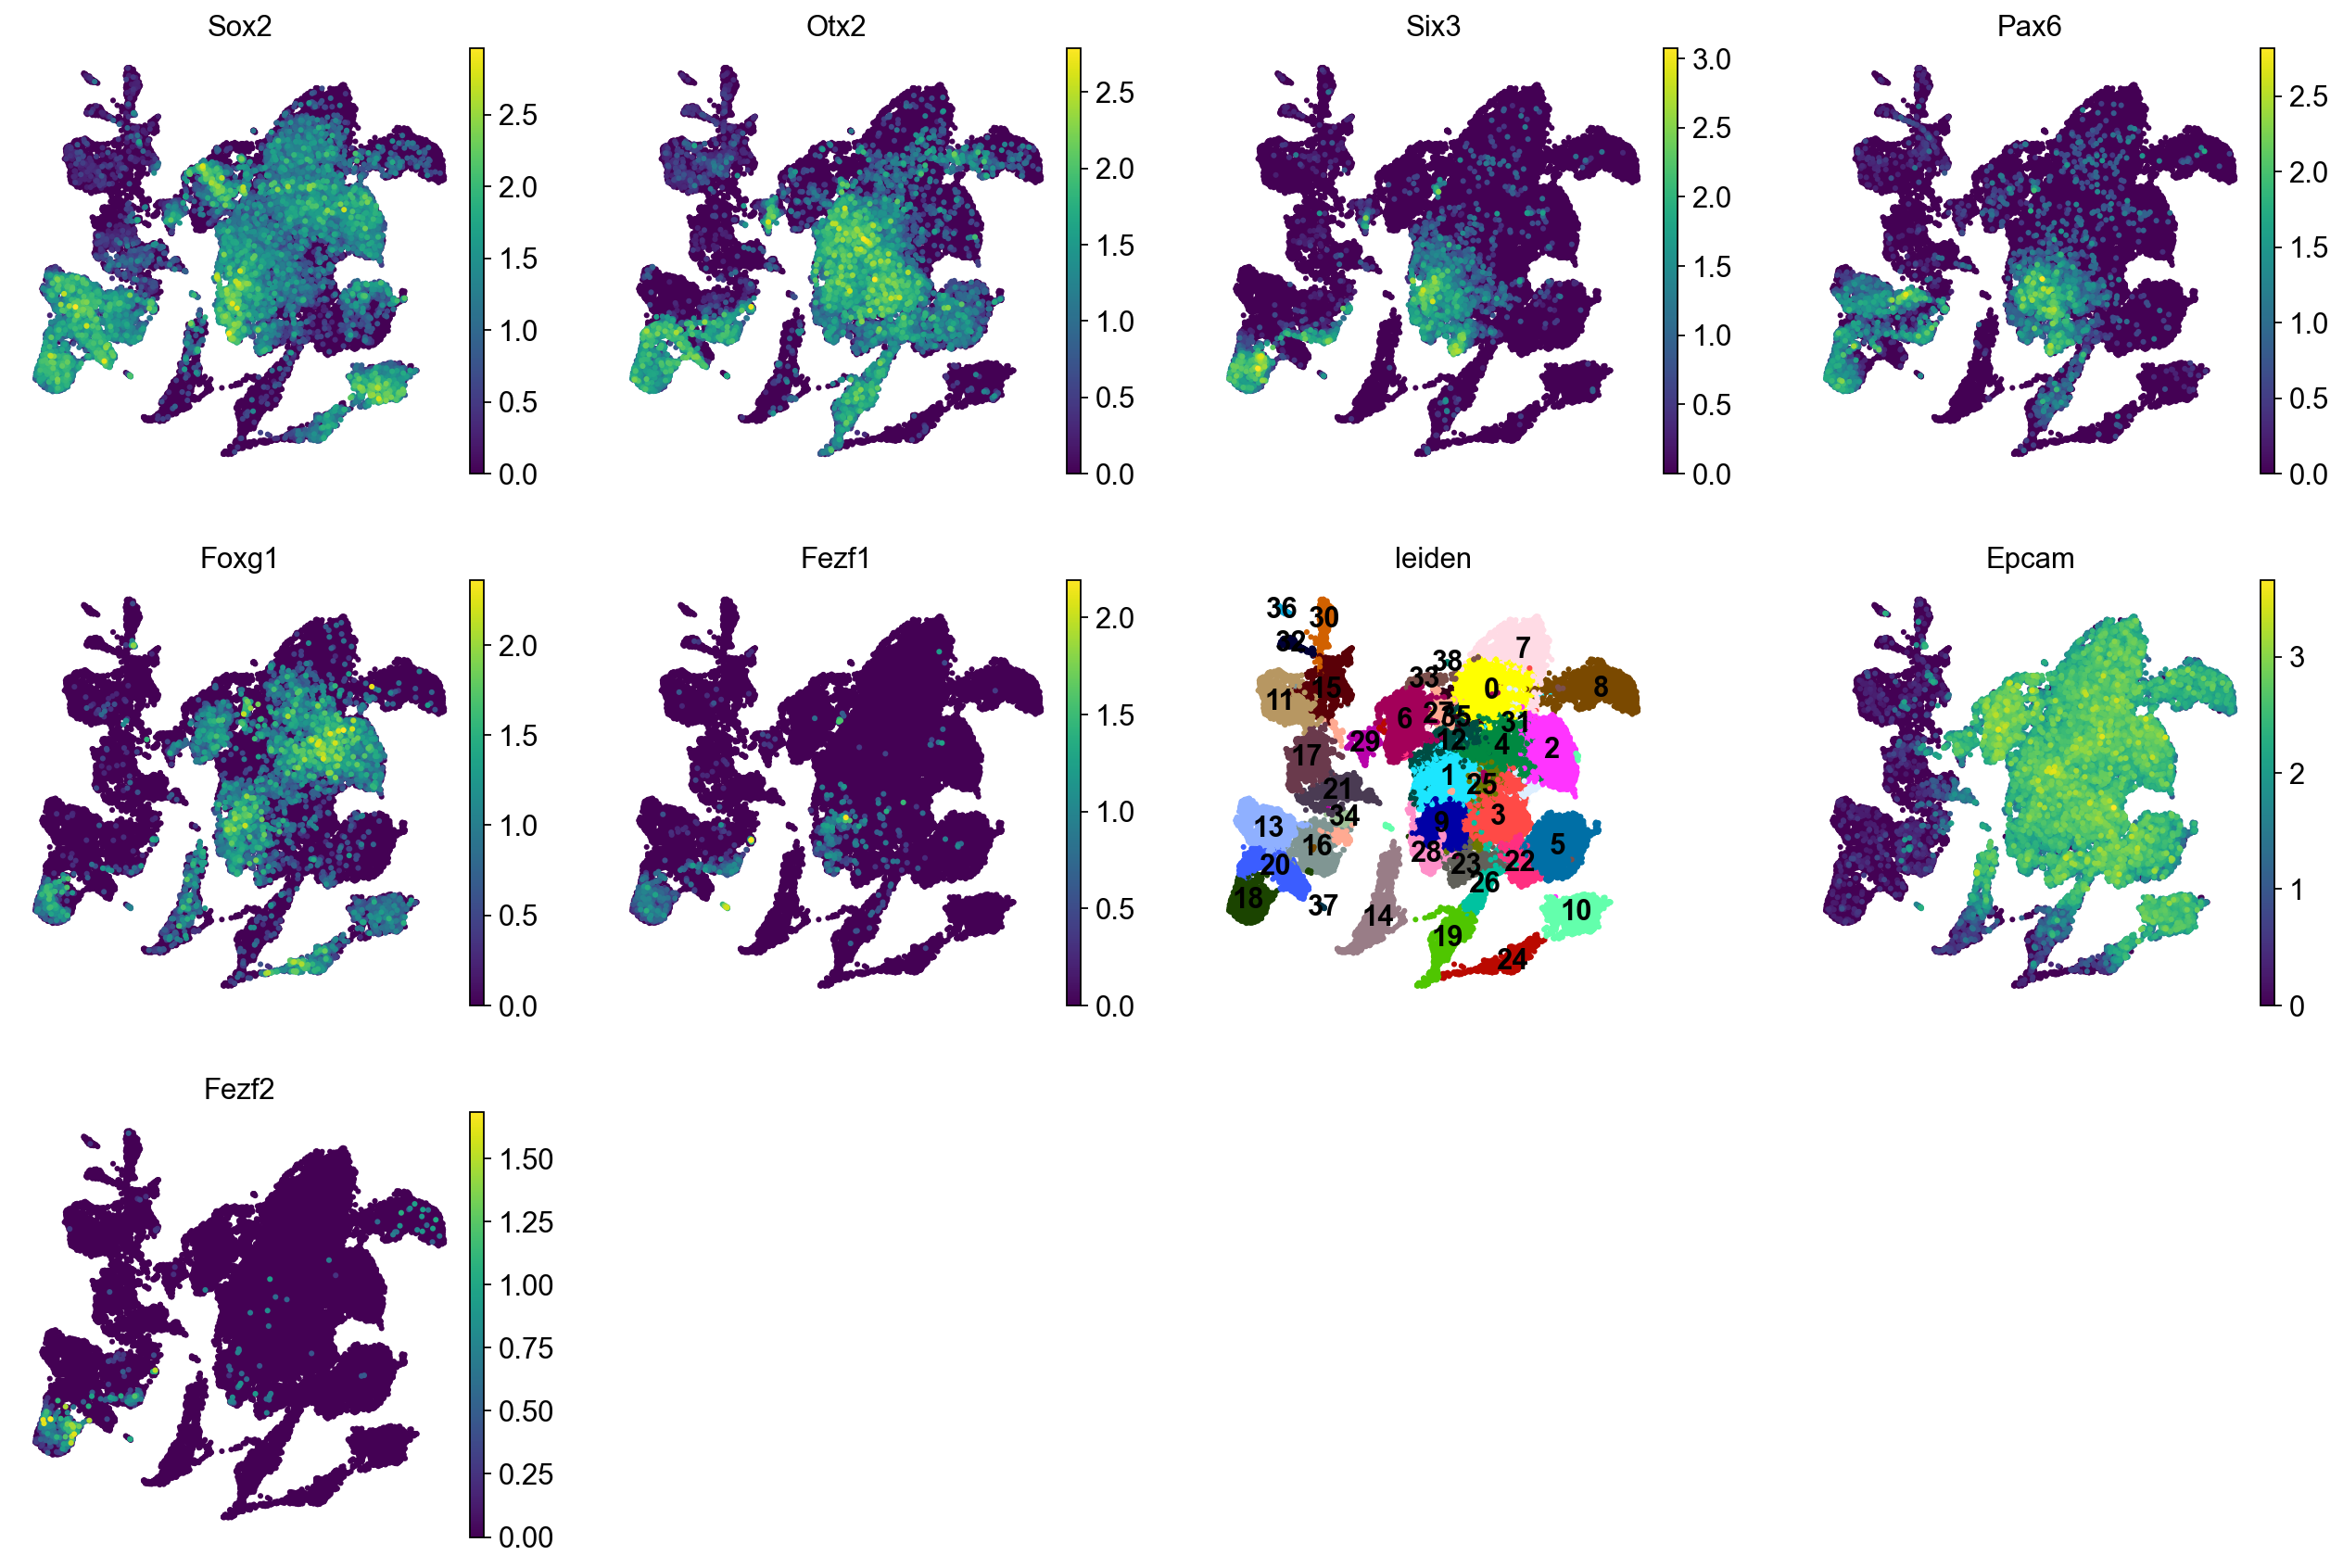

In [ ]:
sc.pl.umap(adata_all, color=main_forebrain,  size=30, frameon=False, legend_loc='on data')

In [ ]:
adata_all

AnnData object with n_obs × n_vars = 55025 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
# Define masks for clusters
cl18_mask1 = adata_all.obs['leiden'] == '18'
cl28_mask1 = adata_all.obs['leiden'] == '28'

# Define "rest" as all other cells
rest_mask_18 = ~cl18_mask1  # everything except cluster 18
rest_mask_28 = ~cl28_mask1  # everything except cluster 28

In [ ]:

# Helper function to get expressed genes in given cell group
def get_expressed_genes(adata_subset, min_frac):
    expr = np.array((adata_subset.X > 0).mean(axis=0)).flatten()
    return adata_subset.var_names[expr >= min_frac].tolist()

# Subsets
adata_cl18 = adata_all[cl18_mask1]
adata_cl28 = adata_all[cl28_mask1]
adata_rest = adata_all[rest_mask_18 & rest_mask_28]  # everything except cl18 and cl28

# Get expressed genes
genes_cl18 = get_expressed_genes(adata_cl18, 0.07)
genes_cl28 = get_expressed_genes(adata_cl28,  0.07)
genes_rest = get_expressed_genes(adata_rest, 0.05)



In [ ]:
len(genes_cl18)


11479

In [ ]:
len(genes_cl28)

10808

In [ ]:
len(genes_rest)

10993

In [ ]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_TF = []
    for line in file.read().split('\n'):

                list_TF.append(line)

#print(list_TF)

In [ ]:
# Create a dictionary to store the binary results
data = {
    'olfactory': [1 if gene in genes_olfactory else 0 for gene in list_TF],
    'forebrain': [1 if gene in genes_cl28 else 0 for gene in list_TF],
   # 'rest': [1 if gene in genes_rest else 0 for gene in list_TF],
  'trigeminal': [1 if gene in genes_trigeminal else 0 for gene in list_TF],
  'epibranchial': [1 if gene in genes_epibranchial else 0 for gene in list_TF],
  'otic': [1 if gene in genes_otic else 0 for gene in list_TF],
    'adenohypophyseal': [1 if gene in genes_adenohypophyseal else 0 for gene in list_TF],

    #'otic_vesicle': [1 if gene in genes_otic_vesicle else 0 for gene in list_TF],
  #'epibranchial_neurulation': [1 if gene in genes_epibranchial_neurulation else 0 for gene in list_TF],
   # 'trigeminal__neurulation': [1 if gene in genes_trigeminal__neurulation else 0 for gene in list_TF],
    #'otic__neurulation': [1 if gene in genes_otic__neurulation else 0 for gene in list_TF],
    'lens': [1 if gene in genes_lens else 0 for gene in list_TF]
    #'trigeminal__neurulation': [1 if gene in genes_trigeminal__neurulation else 0 for gene in list_TF],
}

# Convert to a DataFrame
binary = pd.DataFrame(data, index=list_TF)
binary.index.name = 'TF'  # Set index name if desired

# Display the DataFrame
binary.head()  # Display first few rows

,olfactory,forebrain,trigeminal,epibranchial,otic,adenohypophyseal,lens
TF,,,,,,,
Bcl6b,0,0,0,0,0,0,0
Zscan26,1,1,1,1,1,1,1
Mtf1,1,1,1,1,1,1,1
Klf9,1,1,1,0,0,1,1
Zic5,0,0,0,0,0,0,0


In [ ]:
binary_placodes_2=binary[(binary.sum(axis=1) > 0) & (binary.sum(axis=1) <7) ]
binary_placodes_2

,olfactory,forebrain,trigeminal,epibranchial,otic,adenohypophyseal,lens
TF,,,,,,,
Klf9,1,1,1,0,0,1,1
Zfp691,1,1,0,0,0,0,0
Bcl6,1,1,1,1,0,0,0
Tfap2b,1,1,1,1,0,1,1
Tfap2c,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...
Zfp975,1,1,1,1,0,1,1
Zmat4,1,1,0,0,0,0,1
Zrsr1,1,1,0,0,0,0,0


In [ ]:
binary_placodes_2.to_csv('/home/julia/data/placodes/ANDYs_notebboks/For_paper/Cassiopea/placodes_plus_Lens_19_08.csv')